In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import pyplot, patches

In [257]:
tmp_data_path = '../MA_data/data/tmp/'
data_path = '../MA_data/data/'

s_year = 1997-1
e_year = 2020-1


In [258]:
def load_tnic(data_path, s_year, e_year):
    tnic3 =  pd.read_csv(data_path+'tnic2_data/tnic2_data.txt', delimiter = '\t' )
    tnic = tnic3[(tnic3['year'] <= e_year) & (tnic3['year'] >= s_year)]


    tnic['gvkey1'] = tnic['gvkey1'].astype(str)
    tnic['gvkey2'] = tnic['gvkey2'].astype(str)

    tnic = tnic.dropna(subset=['score'])
    return tnic
    

In [259]:
def get_gvkeylst_adj(tnic, year, top_peer=10, get_adj=False, weighted=False):

    def add_rank(df):
        df['rank'] = df.groupby('gvkey1')['score'].rank('dense', ascending=False)
        df['rank'] = df['rank'].astype(int)
        return df
    
    tnic_year = tnic[tnic.year == year]

    tnic_year = add_rank(tnic_year)
    tnic_year_top = tnic_year[tnic_year['rank'] <= top_peer].reset_index(drop=True)
    
    
    gvkey_arr = np.unique(tnic_year_top.gvkey1.unique())
    gvkey_lst = list(gvkey_arr)
    N = len(gvkey_lst)
    
    gvkey_index_mapping = {value:index for index, value in enumerate(gvkey_lst)}
    index_gvkey_mapping = {index:value for index, value in enumerate(gvkey_lst)}
    #return tnic_year_top, gvkey_arr gvkey_index_mapping, index_gvkey_mapping
    if get_adj:
        adj = np.zeros((N,N))
        
        for _, row in tnic_year_top.iterrows():
            
            gvkey1 = row['gvkey1']
            gvkey2 = row['gvkey2']
            score = row['score']
            
            index1 = gvkey_index_mapping[gvkey1]
            index2 = gvkey_index_mapping[gvkey2]
#            print(index1, index2)
            
            
            
            if weighted:
                adj[index1, index2] = score
            else:
                adj[index1, index2] = 1
            
        
        return gvkey_lst, gvkey_index_mapping, index_gvkey_mapping,   adj    
    else:
        return gvkey_lst, gvkey_index_mapping, index_gvkey_mapping
    
    
    
    

In [260]:
def draw_adjacency_matrix(adj):
    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    plt.spy(adj, markersize=0.03)
    plt.show()
    

# Main

In [261]:
tnic = load_tnic(data_path, s_year, e_year)

<ipython-input-258-f7492e5bb0d7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tnic['gvkey1'] = tnic['gvkey1'].astype(str)
<ipython-input-258-f7492e5bb0d7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tnic['gvkey2'] = tnic['gvkey2'].astype(str)


## Q: could we use gvkey1 instead of gvkey1+gvkey2 to create gvkey list per year

- Yes

In [262]:
year = 2004

In [263]:
tnic_2004 = tnic[tnic.year==2004]

In [264]:

gvkey_lst_2004,_,_ = get_gvkeylst_adj(tnic, year=2004)


<ipython-input-259-d910e287bc74>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rank'] = df.groupby('gvkey1')['score'].rank('dense', ascending=False)
<ipython-input-259-d910e287bc74>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rank'] = df['rank'].astype(int)


In [265]:

sum(~(np.unique(tnic_2004.gvkey1) == np.unique(np.concatenate((tnic_2004.gvkey1, tnic_2004.gvkey2)))))


0

## Get adjacency and Plot


<ipython-input-259-d910e287bc74>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rank'] = df.groupby('gvkey1')['score'].rank('dense', ascending=False)
<ipython-input-259-d910e287bc74>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rank'] = df['rank'].astype(int)


total num of edges:  75617.0


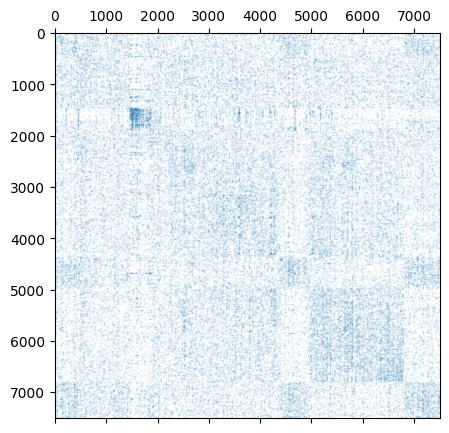

In [268]:
test_year = 1997
_, _ , _,adj = get_gvkeylst_adj(tnic, year=test_year, top_peer=10, get_adj=True)
print("total num of edges: ", sum(sum(adj)))
draw_adjacency_matrix(adj)